In [1]:
import pandas as pd

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [4]:
exceldata = pd.read_excel("C://Users//Joseph//Documents//ExcelR_Impact_Recession_on_Retail//P-44//Retail-Ecommerce.xlsx")

In [5]:
exceldata.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
exceldata.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
exceldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df=exceldata[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [9]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [10]:
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

#There are totally 38 countries

In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Quantity and UnitPrice has negative values

In [12]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [13]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

Removing Negative values

In [14]:
df = df[(df.Quantity>0)&(df.UnitPrice>0)]

In [15]:
# parse date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [16]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [17]:
df.UnitPrice.describe()

count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [18]:
df.Quantity.describe()

count    530104.000000
mean         10.542037
std         155.524124
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Removing missing data in Customer ID 

In [19]:
df = df.dropna(subset=['CustomerID'])

In [20]:
df.CustomerID.describe()

count    397884.000000
mean      15294.423453
std        1713.141560
min       12346.000000
25%       13969.000000
50%       15159.000000
75%       16795.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [21]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,397884.000000,397884.000000,397884.000000
mean,15294.423453,12.988238,3.116488
std,1713.141560,179.331775,22.097877
min,12346.000000,1.000000,0.001000
25%,13969.000000,2.000000,1.250000
50%,15159.000000,6.000000,1.950000
75%,16795.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [22]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [23]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country,TotalAmount
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,15.30
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,20.34
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,22.00
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,20.34
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,20.34


In [24]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','TotalAmount','Description','InvoiceDate','Country']]

In [25]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


Create column fr year and month

In [26]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

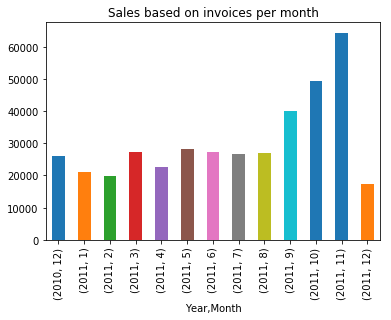

In [27]:
df.groupby(['Year', 'Month']).InvoiceNo.count().plot(kind='bar', title='Sales based on invoices per month')

Here, We can see a gradual increase in sales till November 2011 and less sales in december 2011

In [28]:
countryprice=df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

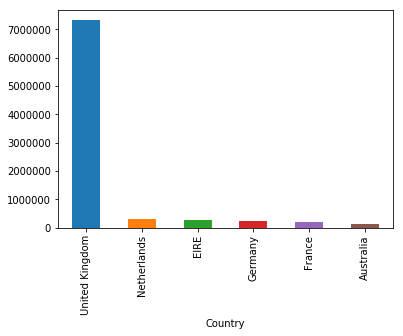

In [29]:
countryprice[:6].plot(kind='bar')

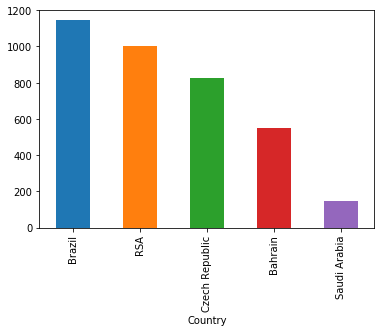

In [30]:
countryprice[-5:].plot(kind='bar')

In [31]:
sales = df.groupby(['StockCode','Description','Country'])['Quantity','TotalAmount'].sum().sort_values(by = 'Quantity',ascending = False)
sales

,,,Quantity,TotalAmount
StockCode,Description,Country,,
23843,"PAPER CRAFT , LITTLE BIRDIE",United Kingdom,80995,168469.60
23166,MEDIUM CERAMIC TOP STORAGE JAR,United Kingdom,76919,80291.44
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,United Kingdom,49182,12137.80
85099B,JUMBO BAG RED RETROSPOT,United Kingdom,41981,77371.57
85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,34648,94858.60
84879,ASSORTED COLOUR BIRD ORNAMENT,United Kingdom,32727,52395.99
22197,POPCORN HOLDER,United Kingdom,28935,21861.11
22616,PACK OF 12 LONDON TISSUES,United Kingdom,24337,6933.59
17003,BROCADE RING PURSE,United Kingdom,22711,5901.93


### Discussion(24-02-2021)

Note:
1)Research on StockCode, unique values - have to find out
2)Product sold frequently(per month) - have to find out
3)Top 10 products (UK)
4)Top 10 customer (UK)

In [32]:
df['StockCode'].nunique() #No.of products

3665

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
CustomerID     397884 non-null float64
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Quantity       397884 non-null int64
UnitPrice      397884 non-null float64
TotalAmount    397884 non-null float64
Description    397884 non-null object
InvoiceDate    397884 non-null datetime64[ns]
Country        397884 non-null object
Year           397884 non-null int64
Month          397884 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 36.4+ MB


### Top 10 Quantities of products sold

In [34]:
Top10quantity = df.groupby(['Description','CustomerID','Country'])['Quantity'].sum().sort_values(ascending = False)
Top10quantity[:10]



Description                         CustomerID  Country       
PAPER CRAFT , LITTLE BIRDIE         16446.0     United Kingdom    80995
MEDIUM CERAMIC TOP STORAGE JAR      12346.0     United Kingdom    74215
WORLD WAR 2 GLIDERS ASSTD DESIGNS   16333.0     United Kingdom    10080
BROCADE RING PURSE                  16422.0     United Kingdom    10080
POPCORN HOLDER                      17949.0     United Kingdom     9292
RED  HARMONICA IN BOX               16333.0     United Kingdom     8120
SMALL CHINESE STYLE SCISSOR         16308.0     United Kingdom     8000
WORLD WAR 2 GLIDERS ASSTD DESIGNS   12901.0     United Kingdom     6768
PACK OF 12 LONDON TISSUES           17306.0     United Kingdom     6624
FAIRY CAKE FLANNEL ASSORTED COLOUR  15749.0     United Kingdom     6228
Name: Quantity, dtype: int64

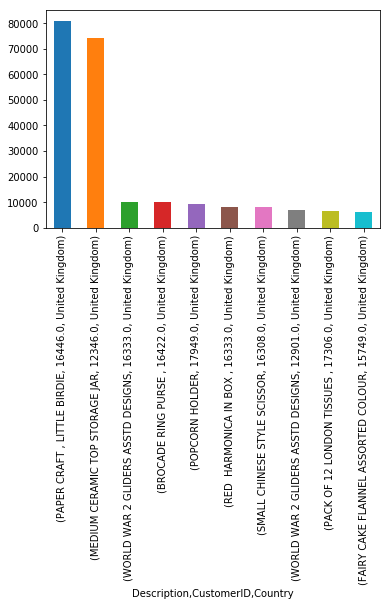

In [35]:
Top10quantity[:10].plot(kind='bar')

### Top 10 Customers

In [36]:
Top10Customer = df.groupby(['CustomerID','Description','Country'])['CustomerID'].count().sort_values(ascending = False)
Top10Customer[:10]

CustomerID  Description                          Country       
14911.0     CARRIAGE                             EIRE              84
17841.0     CHILLI LIGHTS                        United Kingdom    64
            PACK OF 60 DINOSAUR CAKE CASES       United Kingdom    54
14911.0     REGENCY CAKESTAND 3 TIER             EIRE              50
17841.0     BLUE/CREAM STRIPE CUSHION COVER      United Kingdom    49
            CHARLOTTE BAG SUKI DESIGN            United Kingdom    48
            GUMBALL COAT RACK                    United Kingdom    47
            SKULL DESIGN TV DINNER TRAY          United Kingdom    42
            SUKI  SHOULDER BAG                   United Kingdom    40
            ASSORTED COLOUR LIZARD SUCTION HOOK  United Kingdom    40
Name: CustomerID, dtype: int64

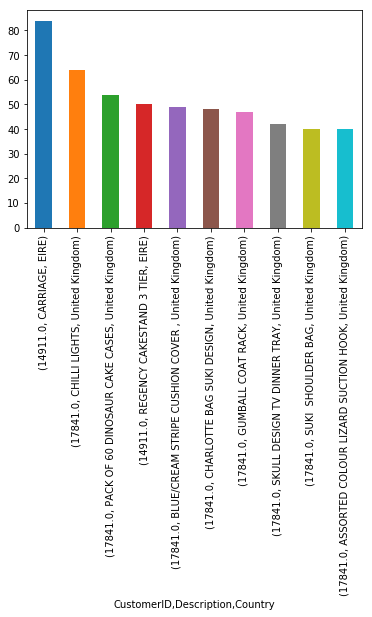

In [37]:
Top10Customer[:10].plot(kind='bar')

#Checking InvoiceNo for cancelled transaction

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
CustomerID     397884 non-null float64
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Quantity       397884 non-null int64
UnitPrice      397884 non-null float64
TotalAmount    397884 non-null float64
Description    397884 non-null object
InvoiceDate    397884 non-null datetime64[ns]
Country        397884 non-null object
Year           397884 non-null int64
Month          397884 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 36.4+ MB


In [39]:
df['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

In [40]:
df['InvoiceNo'].astype(str).str.contains('C')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
541879    False
541880    False
541881    False
541882    False
541883    False
541884    False
541885    False
541886    False
541887    False
541888    False
541889    False
541890    False
541891    False
541892    False
541893    False
541894    False
541895    False
541896    False
541897    False
541898    False
541899    False
541900    False
541901    False
541902    False
541903    False
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length:

In [41]:
df['Description'].astype(str).str.contains('Adjust bad debt')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
541879    False
541880    False
541881    False
541882    False
541883    False
541884    False
541885    False
541886    False
541887    False
541888    False
541889    False
541890    False
541891    False
541892    False
541893    False
541894    False
541895    False
541896    False
541897    False
541898    False
541899    False
541900    False
541901    False
541902    False
541903    False
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Description, Lengt

In [42]:
df['InvoiceDate'].max() #The last data from our dataset

Timestamp('2011-12-09 12:50:00')

#Creating Date column

In [43]:
df['date'] = df['InvoiceDate'].dt.date

In [44]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Year,Month,date
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12,2010-12-01
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12,2010-12-01
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12,2010-12-01
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010,12,2010-12-01
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010,12,2010-12-01


### Recency

how many days ago was the customer's last purchase

In [45]:
#last date of purshace
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [46]:
# Extracting amount by multiplying quantity and unit price and saving the data into amount variable.
amount  = pd.DataFrame(df.Quantity * df.UnitPrice, columns = ["Amount"])
amount.head()

,Amount
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34


In [47]:
import time, warnings
import datetime as dt

In [48]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [49]:
#recency calculation
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [50]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [51]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [52]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


### Frequency

how many times a customer purchased from us

In [53]:
frequency_df = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [63]:
frequency_df

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,85
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


### Monetary

How much money did the customer spent over time

In [54]:
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'TotalAmount': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Creating RFM Table

In [55]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [56]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [57]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.00,17.0,307.415
0.50,50.00,41.0,674.485
0.75,141.75,100.0,1661.740


In [58]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000007}}

In [59]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [60]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [61]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,18,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


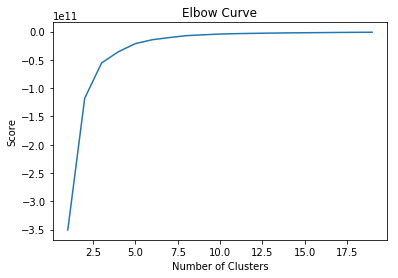

In [62]:
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [63]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [64]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,18,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


In [65]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [66]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster
CustomerID,,,,,,,,
12347.0,2,182,4310.00,4,4,4,444,0
12348.0,75,31,1797.24,2,2,4,224,0
12349.0,18,73,1757.55,3,3,4,334,0
12350.0,310,17,334.40,1,1,2,112,0
12352.0,36,85,2506.04,3,3,4,334,0
12353.0,204,4,89.00,1,1,1,111,0
12354.0,232,58,1079.40,1,3,3,133,0
12355.0,214,13,459.40,1,1,2,112,0
12356.0,22,59,2811.43,3,3,4,334,0


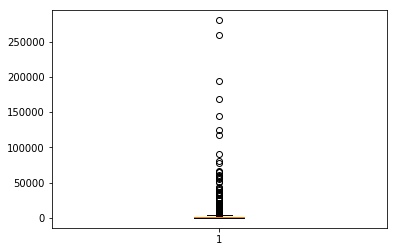

In [67]:
# outlier treatment for Amount
plt.boxplot(rfm_df.Monetary)
Q1 = rfm_df.Monetary.quantile(0.25)
Q3 = rfm_df.Monetary.quantile(0.75)
IQR = Q3 - Q1
RFM = rfm_df[(rfm_df.Monetary >= (Q1 - 1.5*IQR)) & (rfm_df.Monetary <= (Q3 + 1.5*IQR))]

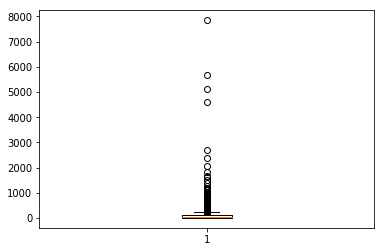

In [103]:
# outlier treatment for Frequency
plt.boxplot(rfm_df.Frequency)
Q1 = rfm_df.Frequency.quantile(0.25)
Q3 = rfm_df.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

In [104]:
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,2
12347.0,2,182,4310.00,4,4,4,444,0
12348.0,75,31,1797.24,2,2,4,224,0
12349.0,18,73,1757.55,3,3,4,334,0
12350.0,310,17,334.40,1,1,2,112,0


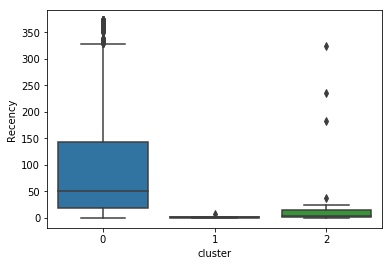

In [69]:
'''
cluster 0 have high recency rate which is bad. cluster 1 and cluster 2 having low so they are in race of platinum
and gold customer.
'''
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Recency)

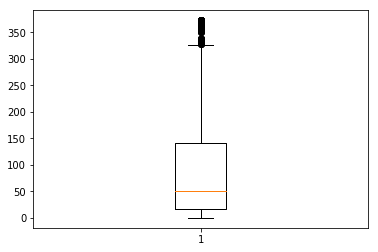

In [70]:
# outlier treatment for Recency
plt.boxplot(rfm_df.Recency)
Q1 = rfm_df.Recency.quantile(0.25)
Q3 = rfm_df.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = rfm_df[(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

In [71]:
RFM.head(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,2
12347.0,2,182,4310.00,4,4,4,444,0
12348.0,75,31,1797.24,2,2,4,224,0
12349.0,18,73,1757.55,3,3,4,334,0
12350.0,310,17,334.40,1,1,2,112,0
12352.0,36,85,2506.04,3,3,4,334,0
12353.0,204,4,89.00,1,1,1,111,0
12354.0,232,58,1079.40,1,3,3,133,0
12355.0,214,13,459.40,1,1,2,112,0


In [72]:
# standardise all parameters
RFM.columns

Index(['Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile',
       'M_Quartile', 'RFMScore', 'cluster'],
      dtype='object')

In [73]:
RFM.Recency = RFM.Recency.dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [105]:

#RFM.Recency = RFM.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM)
RFM_norm1 = pd.DataFrame(RFM_norm1)


In [106]:
RFM_norm1.head()

,0,1,2,3,4,5,6,7
0,2.225278,-1.036341,19.238124,-1.272438,-1.261009,1.517044,-1.317965,19.625161
1,-0.955741,2.495857,0.771360,1.448911,1.548753,1.517044,1.541453,-0.052201
2,-0.236811,-0.450894,0.134606,-0.365322,-0.324422,1.517044,-0.364826,-0.052201
3,-0.798167,0.368732,0.124549,0.541795,0.612166,1.517044,0.588314,-0.052201
4,2.077553,-0.724103,-0.236089,-1.272438,-1.261009,-0.341059,-1.335295,-0.052201


In [108]:
RFM_norm1 = RFM_norm1[[0,1,2]]
RFM_norm1.head()

,0,1,2
0,2.225278,-1.036341,19.238124
1,-0.955741,2.495857,0.771360
2,-0.236811,-0.450894,0.134606
3,-0.798167,0.368732,0.124549
4,2.077553,-0.724103,-0.236089


In [109]:
RFM_norm1.columns = ['Recency', 'Frequency','Monetary']

In [110]:
RFM_norm1.head()

,Recency,Frequency,Monetary
0,2.225278,-1.036341,19.238124
1,-0.955741,2.495857,0.771360
2,-0.236811,-0.450894,0.134606
3,-0.798167,0.368732,0.124549
4,2.077553,-0.724103,-0.236089


In [79]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,cluster
CustomerID,,,,,,,,
14646.0,1,2076,280206.02,4,4,4,444,1
18102.0,0,431,259657.30,4,4,4,444,1
17450.0,8,337,194550.79,4,4,4,444,1
14911.0,1,5675,143825.06,4,4,4,444,1
14156.0,9,1400,117379.63,4,4,4,444,2
17511.0,2,963,91062.38,4,4,4,444,2
16684.0,4,277,66653.56,4,4,4,444,2
14096.0,4,5111,65164.79,4,4,4,444,2
13694.0,3,568,65039.62,4,4,4,444,2


In [80]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Good Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Better customer: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('No more customers: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Bad Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  440
Good Customers:  1080
Better customer:  1085
No more customers:  103
Lost Customers:  21
Bad Customers:  385


In [86]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
        return H

In [87]:
 hopkins(RFM_norm1)

In [88]:
RFM_norm1

,Recency,Frequency,Monetary
0,2.776846,-0.401129,8.207044
1,-0.917310,0.377425,0.239777
2,-0.082408,-0.272087,-0.034943
3,-0.734318,-0.091428,-0.039282
4,2.605291,-0.332306,-0.194875
5,-0.528451,-0.039811,0.042550
6,1.392967,-0.388225,-0.221705
7,1.713204,-0.155949,-0.113424
8,1.507337,-0.349512,-0.181209
9,-0.688570,-0.151647,0.075938


In [97]:
# Kmeans with K=5
model_clus4 = KMeans(n_clusters = 5, max_iter=50)
model_clus4.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

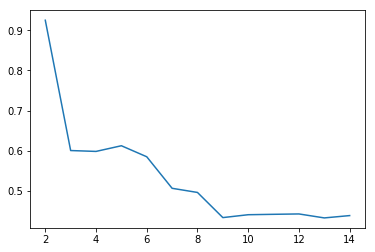

In [99]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

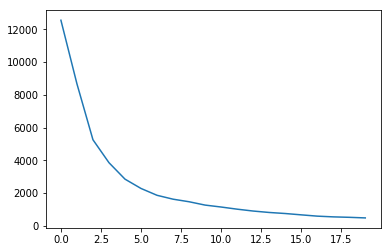

In [100]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [101]:
pd.RangeIndex(len(RFM.index))

RangeIndex(start=0, stop=4183, step=1)

In [102]:
RFM_km = pd.concat([RFM, pd.Series(model_clus4.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

ValueError: Length mismatch: Expected axis has 9 elements, new values have 5 elements